In [1]:
import sys

# 親ディレクトリのパスを直接追加
sys.path.append('/Users/ham/Desktop/LSHiforest')

import numpy as np
import pandas as pd
from CLSHiForest import CLSHiForest
from sklearn.metrics import accuracy_score

In [2]:
# データの準備
df_features = pd.read_csv("NUSW-NB15_features.csv", encoding='cp1252')
feature_names = df_features['Name'].tolist()
df = pd.read_csv("UNSW-NB15_1.csv", header=None, low_memory=False)
df.columns = feature_names

df = df.iloc[:10000, :]
normal_data = df[df['Label'] == 0]
anomaly_data = df[df['Label'] == 1]

print(f"正常データ: {len(normal_data)}件")
print(f"異常データ: {len(anomaly_data)}件")

train_size = 0.8  # 学習データの割合
normal_train = normal_data.sample(frac=train_size, random_state=42)
normal_test = normal_data.drop(normal_train.index)

categorical_features = ['proto', 'service', 'state', 'is_sm_ips_ports', 'is_ftp_login']
X_train = normal_train[categorical_features]
y_train = normal_train['Label']  # すべて0

test_data = pd.concat([normal_test, anomaly_data])
X_test = test_data[categorical_features]
y_test = test_data['Label']

print(f"トレーニングデータ: {len(X_train)}件 (すべて正常データ)")
print(f"テストデータ: {len(X_test)}件")
print(f" - 正常データ: {sum(y_test == 0)}件")
print(f" - 異常データ: {sum(y_test == 1)}件")

正常データ: 9327件
異常データ: 673件
トレーニングデータ: 7462件 (すべて正常データ)
テストデータ: 2538件
 - 正常データ: 1865件
 - 異常データ: 673件


In [3]:
# モデル訓練・評価
model = CLSHiForest(n_trees=100, max_depth=10, hash_dim=3, min_samples=10, random_state=42)
model.fit(X_train)
scores = model.decision_function(X_test)

One-hotEncode後の特徴量数:(7462, 23)


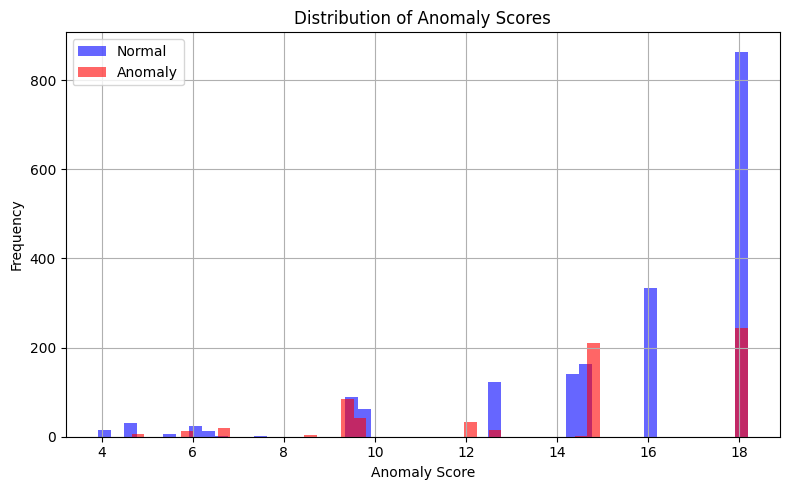

In [4]:
# 異常スコアの分布をプロット
model.plot_score_distribution(scores, y_test)

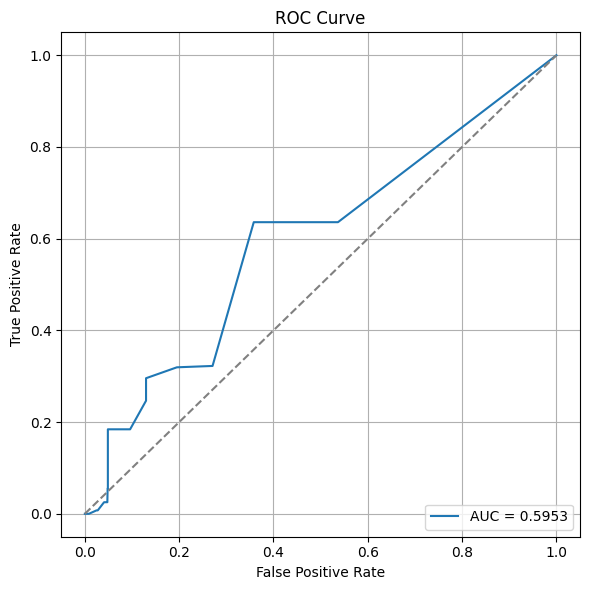

In [5]:
# AUC-ROCを計算
auc = model.plot_roc_curve(scores, y_test)

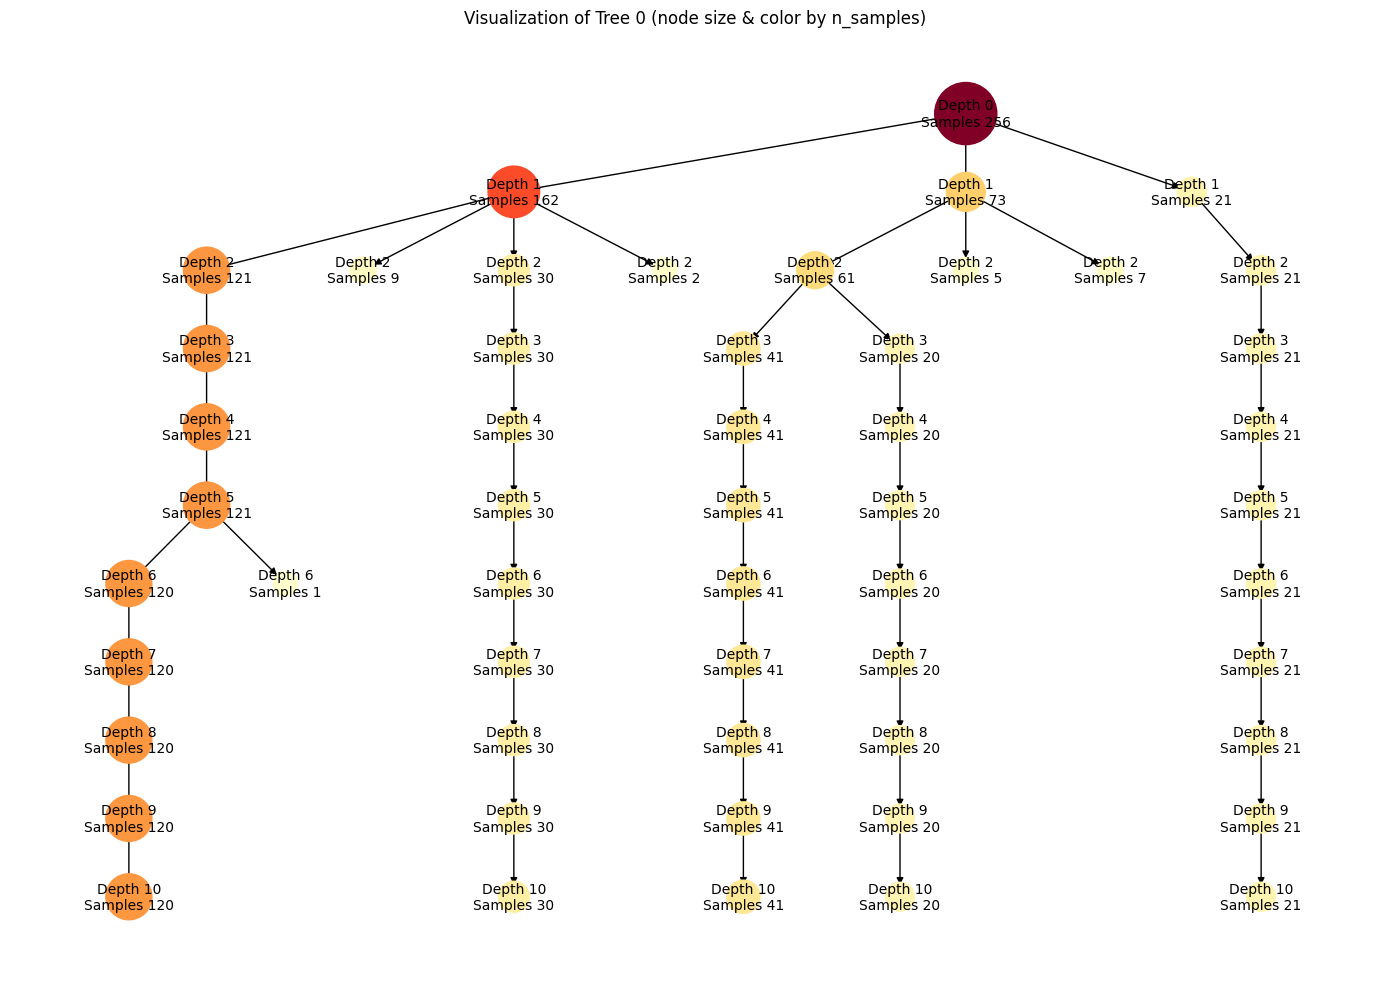

In [6]:
# 最初の木を可視化
model.visualize_tree()